In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [ ]:
## https://www.openml.org/search?type=data&sort=runs&id=1506&status=active
## 깃허브에서 데이터를 불러옵니다.
!git clone https://github.com/Ho12615054/Hans_Farm.git

data_set = pd.read_csv("./Hans_Farm/Data/Thoraric_Surgery.csv", delimiter=",")
data_set

Cloning into 'Hans_Farm'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 19.58 KiB | 409.00 KiB/s, done.


,Unnamed: 0,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Y
0,0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


In [ ]:
## 불필요한 열(Column)을 제거합니다.
data_set = data_set.iloc[:,1:]
data_set

,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Y
0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


## 인공지능의 목적
### 1. 분류
### 2. 회귀

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 이 인공지능은 무엇을 위한 모델인가?

In [ ]:
## 딥러닝 모델의 구조를 설계합니다.
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 인공지능의 목적은 출력층의 활성화 함수(Activation Function)에 따라 달라진다.
### 위 인공지능에서 출력층은 어디인가?
### 위 인공지능에서 출력의 활성화 함수는 무엇인가?

## 출력층의 활성화 함수가..
### Sigmoid: 이진 분류
#### 0 또는 1으로 분류하는 것
#### 자연지수 e를 받은 값인 x제곱의 값을 반환
#### -----------------------------------------------------------------------
### Softmax: 다중 분류
#### 출력 값의 총합을 1로 만드는 함
#### 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합을 1로 만드는 함수
#### -----------------------------------------------------------------------
### 없음: 회귀
#### y = W*x + b
#### 위 식에서 y를 찾는 과정

In [ ]:
# 이 데이터의 y는 몇 종류인가?
## y = W*x + b
## 데이터를 나누어서 지정합니다.
x = data_set.iloc[:,0:16]    # 데이터
y = data_set.iloc[:,16]      # 1 year survival period - (T)rue value if died (T,F)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
y_train

267    0.0
128    1.0
108    0.0
344    0.0
374    0.0
      ... 
280    0.0
50     0.0
74     0.0
443    0.0
306    0.0
Name: Risk1Y, Length: 423, dtype: float64

In [ ]:
## y_train을 구성하는 종류
## 분류하고자 하는 종류가 몇개인가?
y_train.value_counts()

Risk1Y
0.0    363
1.0     60
Name: count, dtype: int64

In [ ]:
# 분류하고자 하는 종류가 두개로 "2진 분류"에 속함
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## 그렇다면 회귀는 어떻게 하는가?
## 출력층의 활성화 함수가 없으면 회귀
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## 모델을 학습시킵니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy'])
y_pred = model.fit(x_train, y_train, validation_split=0.2, epochs=500, batch_size=32)

Epoch 1/500
11/11 [==============================] - 2s 95ms/step - loss: 169.5700 - accuracy: 0.8728 - val_loss: 104.6612 - val_accuracy: 0.8000
Epoch 2/500
11/11 [==============================] - 0s 20ms/step - loss: 73.5556 - accuracy: 0.8669 - val_loss: 37.7722 - val_accuracy: 0.7882
Epoch 3/500
11/11 [==============================] - 0s 23ms/step - loss: 22.9650 - accuracy: 0.8521 - val_loss: 8.9941 - val_accuracy: 0.7765
Epoch 4/500
11/11 [==============================] - 0s 18ms/step - loss: 4.6758 - accuracy: 0.8373 - val_loss: 1.6267 - val_accuracy: 0.7529
Epoch 5/500
11/11 [==============================] - 0s 24ms/step - loss: 1.3048 - accuracy: 0.7249 - val_loss: 1.1640 - val_accuracy: 0.3765
Epoch 6/500
11/11 [==============================] - 0s 19ms/step - loss: 1.2069 - accuracy: 0.4645 - val_loss: 1.0417 - val_accuracy: 0.3294
Epoch 7/500
11/11 [==============================] - 0s 15ms/step - loss: 0.8961 - accuracy: 0.4704 - val_loss: 0.7450 - val_accuracy: 0.4118

In [ ]:
## 예측을 합시다.
## y_pred = W*x+b // y = W*x+b
y_pred = model.predict(x_test)
y_pred = y_pred.flatten() # 차원 펴주기
y_pred = np.where(y_pred > 0.5, 1.0, 0.0) #0.5보다크면 1.0, 작으면 0.0

print('예측 : 실제')
for i in range(len(y_pred)):
  print(y_pred[i],':',y_test.iloc[i])

2/2 [==============================] - 0s 5ms/step
예측 : 실제
0.0 : 1.0
0.0 : 0.0
0.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 1.0
0.0 : 1.0
0.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
1.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 1.0
0.0 : 0.0
0.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 1.0
0.0 : 0.0
0.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0


In [ ]:
## Confusion Matrix를 확인하자
confusion_matrix(y_test, y_pred)

array([[36,  1],
       [10,  0]])

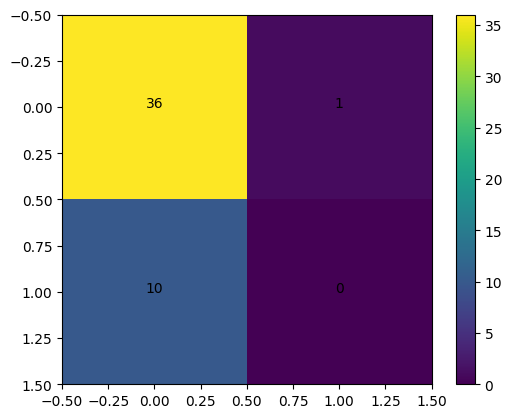

Accuracy: 0.7659574468085106 
Sensitivity: 0.0 
Specificity: 0.972972972972973 
Precision: 0.0 
F1-Score: 0.0 



In [ ]:
## Confusion Matrix를 그려보자!
import itertools
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, "{:,}".format(cm[i, j]),horizontalalignment="center")
plt.colorbar()
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = (tn+tp)/(tn+fp+fn+tp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
f1score = (2*tp)/((2*tp)+fp+fn)
print('Accuracy:',acc,'\nSensitivity:',sensitivity,'\nSpecificity:',specificity,'\nPrecision:',precision,'\nF1-Score:',f1score,'\n')

## 회귀를 실습해보자
#### 관련된 데이터세트 불러오기

In [ ]:
import seaborn as sns

#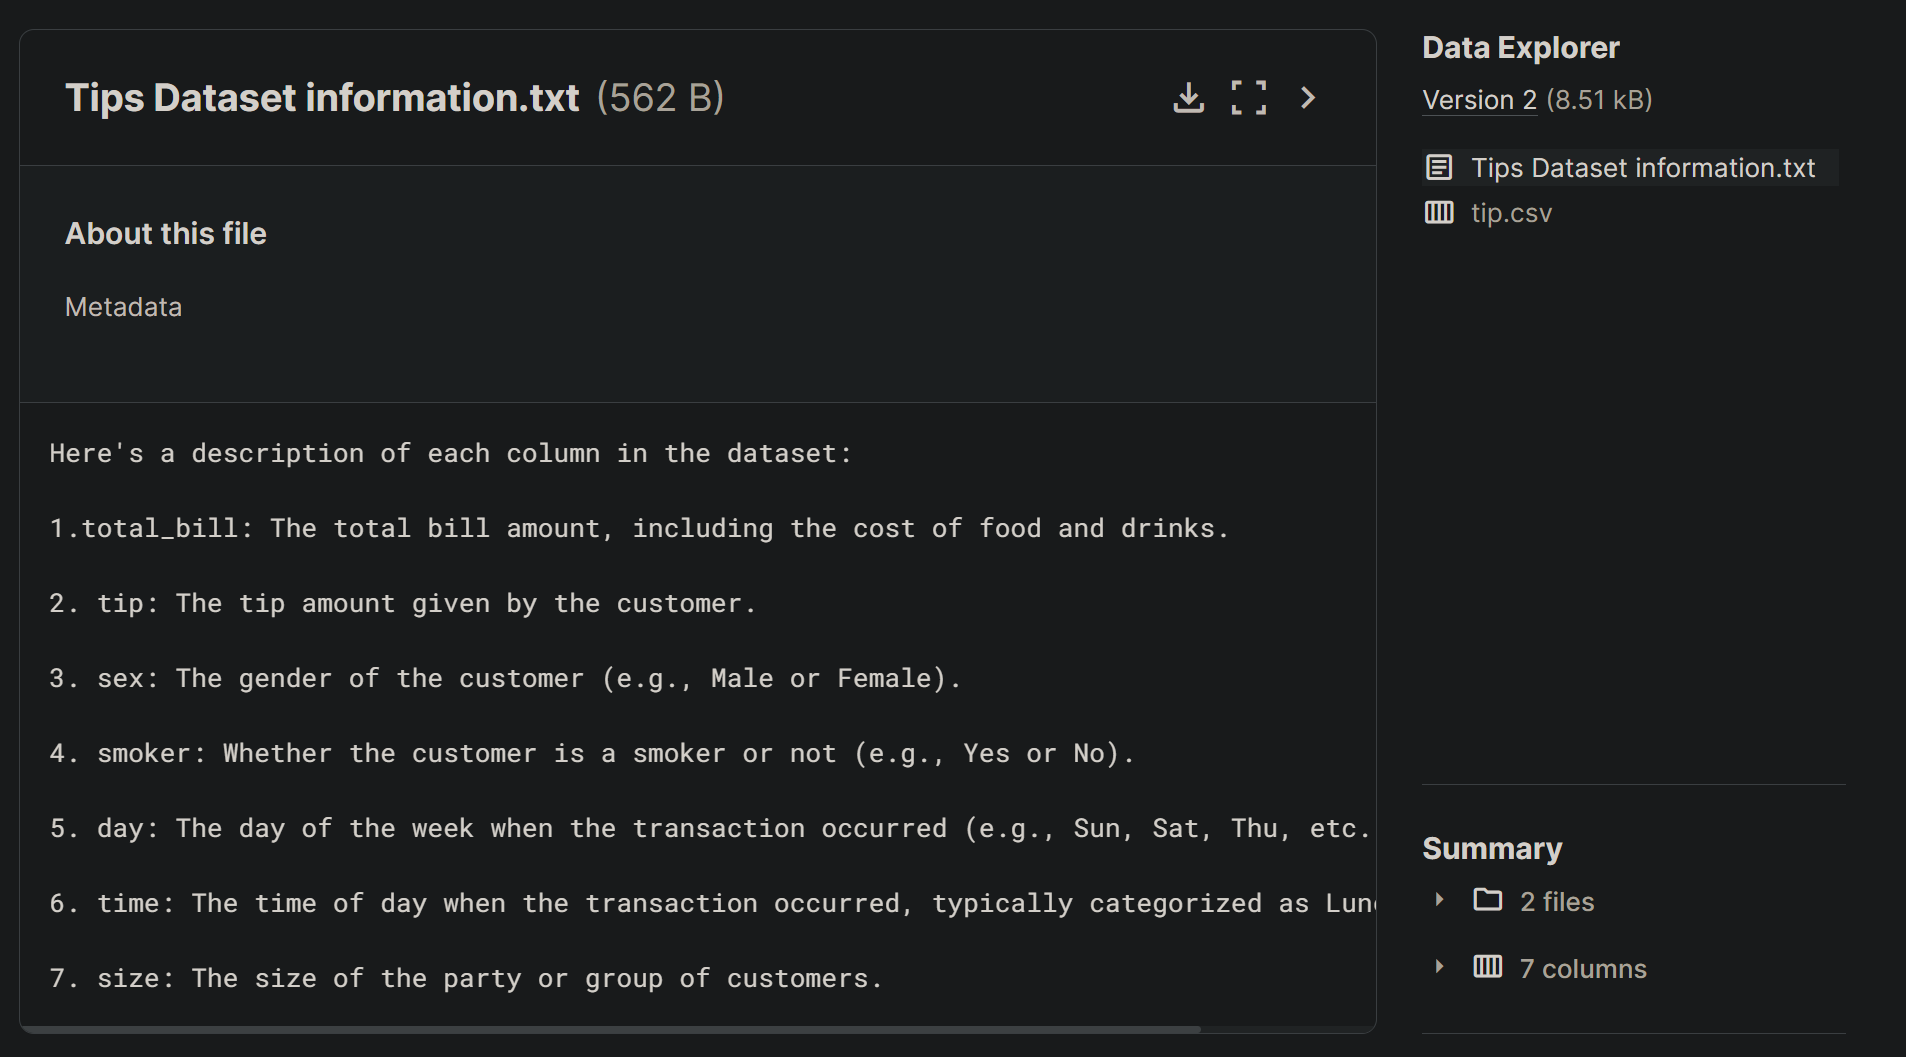

In [ ]:
## https://www.kaggle.com/datasets/sakshisatre/tips-dataset
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 이 데이터로 무엇을 할 수 있을까?
#### 손님이 얼마나 식사를 하는지 예상?
#### 손님이 나에게 얼마나 팁을 줄지 예상?
#### 어떤 요일에 출근해야 팁을 많이 받는지 예상?
#### 어떤 시간에 출근해야 팁을 많이 받는지 예상?
#### ....

In [ ]:
## 오늘 만들어볼 회귀 모델은 "손님이 나에게 얼마나 팁을 줄지 예상"하는 인공지능
## 데이터를 "연산"이 가능하게 만들어야 합니다.
## 지금의 데이터는 연산이 불가능한 데이터
tips

NameError: name 'tips' is not defined

In [ ]:
## 데이터의 열 속성을 확인합니다.
tips.info()

In [ ]:
## category 속성의 열에 존재하는 값을 확인합니다.
print(tips['sex'].unique(),'\n')
print(tips['smoker'].unique(),'\n')
print(tips['day'].unique(),'\n')
print(tips['time'].unique())

In [ ]:
## category 속성의 데이터를 변경합니다.
tips['sex'].replace(['Female', 'Male'],[0, 1], inplace=True)
tips['smoker'].replace(['Yes', 'No'],[0, 1], inplace=True)
tips['day'].replace(['Thur', 'Fri', 'Sat', 'Sun'],[0, 1, 2, 3], inplace=True)
tips['time'].replace(['Lunch', 'Dinner'],[0, 1], inplace=True)
tips

In [ ]:
## 데이터를 나누어서 지정합니다.
x1 = tips.iloc[:,0] # sex, smoker, day, time, size
x2 = tips.iloc[:,2:]  # total_bill
y = tips.iloc[:,1]   # tip

x = pd.concat([x1, x2], axis=1)
x

In [ ]:
## 학습, 평가 데이터로 구분합니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
y_train

In [ ]:
## 그렇다면 회귀 모델을 만들어 볼게요.
## 출력층의 활성화 함수가 없으면 회귀
model = Sequential()
model.add(Dense(30, input_dim=6, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.summary()

In [ ]:
## 모델을 학습시킵니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy'])
y_pred = model.fit(x_train, y_train, validation_split=0.2, epochs=500)

In [ ]:
## 예측을 합시다.
## y_pred = W*x+b // y = W*x+b
y_pred = model.predict(x_test)

print('예측 : 실제')
for i in range(len(y_pred)):
  print(y_pred[i],':',y_test.iloc[i])

In [ ]:
## 내가 직접 입력하는 손님의 정보
## total_bill,	sex,	smoker,	day,	time,	size
total_bill = input('총 식사 금액은 얼마인가요? (소숫점까지 적어주세요. 예)15.11)')
sex = input('손님의 성별은 무엇인가요? 0: 여성/ 1: 남성')
smoker = input('손님의 흡연 유무는 어떤가요? 0: 흡연/ 1: 비흡연')
day = input('손님이 방문한 요일이 무엇인가요? 0: 목/ 1: 금/ 2: 토/ 3: 일')
time = input('손님이 방문한 타임은 언제인가요? 0: 점심/ 1: 저녁')
size = input('손님의 그룹은 몇병인가요? 1~n')

data = [total_bill,	sex,	smoker,	day,	time,	size]
print('\n입력한 손님의 정보는 아래와 같습니다.')
print('총비용:',data[0],' /성별:',data[1],' /흡연유무:',data[2],' /요일:',data[3],' /시간대:',data[4],' /규모:',data[5])

In [ ]:
## 우리가 만든 회귀 모델에 입력하기 위한 데이터 형태로 변경합니다.
input_data = np.reshape(data*2, (2,6))
input_data = input_data.astype(float)
input_data

In [ ]:
y_pred = model.predict(input_data)
print('\n입력한 손님의 정보는 아래와 같습니다.')
print('총비용:',data[0],' /성별:',data[1],' /흡연유무:',data[2],' /요일:',data[3],' /시간대:',data[4],' /규모:',data[5])
print('이 손님이 나에게 줄 Tip:',y_pred[0])